# ЛР2
## Задание
Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
* устранение пропусков в данных;
* кодирование категориальных признаков;
* нормализацию числовых признаков.

## Описание датасета

Космическая обсерватория Кеплер - это спутник, созданный НАСА, который был запущен в 2009 году. Телескоп должен был искать экзопланеты в звездных системах, помимо нашей, с конечной целью, возможно, найти другие обитаемые планеты. По состоянию на май 2016 года Кеплер проверил 1284 новые экзопланеты. По состоянию на октябрь 2017 года насчитывается уже более 3000 подтвержденных экзопланет (с использованием всех методов обнаружения, включая наземные). Телескоп все еще активен и продолжает собирать новые данные о своей расширенной миссии.

Датасет содержит записи всех наблюдаемых Кеплером объектов - 10 000 кандидатов в экзопланеты, за которыми Кеплер наблюдал. Суммарно 9564 строки и 50 колонок.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', None)  

/kaggle/input/kepler-exoplanet-search-results/cumulative.csv


In [2]:
data = pd.read_csv('/kaggle/input/kepler-exoplanet-search-results/cumulative.csv', 
                   sep=",")

In [3]:
data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# 1. Устранение пропусков в данных
В данных присутствуют пропуски

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [5]:
dict_null = dict()
for c in data.columns:
    dict_null[c] = data[c].isnull().sum()*100.0/9564.0

{k:v for (k,v) in dict_null.items() if v>0}

{'kepler_name': 76.0142199916353,
 'koi_score': 15.788373065662903,
 'koi_period_err1': 4.746967795901297,
 'koi_period_err2': 4.746967795901297,
 'koi_time0bk_err1': 4.746967795901297,
 'koi_time0bk_err2': 4.746967795901297,
 'koi_impact': 3.795483061480552,
 'koi_impact_err1': 4.746967795901297,
 'koi_impact_err2': 4.746967795901297,
 'koi_duration_err1': 4.746967795901297,
 'koi_duration_err2': 4.746967795901297,
 'koi_depth': 3.795483061480552,
 'koi_depth_err1': 4.746967795901297,
 'koi_depth_err2': 4.746967795901297,
 'koi_prad': 3.795483061480552,
 'koi_prad_err1': 3.795483061480552,
 'koi_prad_err2': 3.795483061480552,
 'koi_teq': 3.795483061480552,
 'koi_teq_err1': 100.0,
 'koi_teq_err2': 100.0,
 'koi_insol': 3.35633626097867,
 'koi_insol_err1': 3.35633626097867,
 'koi_insol_err2': 3.35633626097867,
 'koi_model_snr': 3.795483061480552,
 'koi_tce_plnt_num': 3.617733166039314,
 'koi_tce_delivname': 3.617733166039314,
 'koi_steff': 3.795483061480552,
 'koi_steff_err1': 4.89335006

Удалю прзнаки с количесвтом пропуском >5%

In [6]:
data.drop(axis=1, columns=list({k for (k,v) in dict_null.items() if v>5}), inplace=True)

In [7]:
data.shape

(9564, 45)

Пропуски в числовых признаках буду заполнять медианой, а пропуски в категориальных признаках буду заполнять специальным значением - "fill"

In [8]:
data.dtypes

rowid                  int64
kepid                  int64
kepoi_name            object
koi_disposition       object
koi_pdisposition      object
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_plnt_num     float64
koi_tce_delivname     object
koi_steff     

In [9]:
object_col = []
for i in list({k for (k,v) in dict_null.items() if v>0 and v<5}):
    if data.dtypes[i] == 'int64' or data.dtypes[i] == 'float64':
        data[i] = data[i].fillna(data[i].median())
    else:
        object_col.append(i)
        data[i] = data[i].fillna('fill')
    

In [10]:
data.isnull().sum()

rowid                0
kepid                0
kepoi_name           0
koi_disposition      0
koi_pdisposition     0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_tce_delivname    0
koi_steff            0
koi_steff_err1       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec        

# 2. Кодирование категориальных признаков
Кодирование категориальных признаков буду производить с помощью разных энкодеров:
kepoi_name, уникальные значения, - sklearn.LabelEncoder
остальные - category_encoders.CountEncoder

In [24]:
object_col = ["kepoi_name", "koi_disposition", "koi_pdisposition", 'koi_tce_delivname']

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

from category_encoders.count import CountEncoder as ce_CountEncoder

ce = ce_CountEncoder(normalize=True)

for i in data.columns:
    if data.dtypes[i] == 'object':
        if i == 'kepoi_name':
            data[i] = le.fit_transform(data[i])
        else:
            data[i] = ce.fit_transform(data[i])

In [28]:
data.head()

,rowid,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,1080,0.239753,0.470096,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,0.842116,5455.0,81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,1081,0.239753,0.470096,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,0.842116,5455.0,81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,1082,0.525199,0.529904,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,0.842116,5853.0,158.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,1083,0.525199,0.529904,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,0.842116,5805.0,157.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,1084,0.239753,0.470096,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,0.842116,6031.0,169.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


В датасете не осталось признаков с типом object

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_fpflag_nt      9564 non-null   int64  
 6   koi_fpflag_ss      9564 non-null   int64  
 7   koi_fpflag_co      9564 non-null   int64  
 8   koi_fpflag_ec      9564 non-null   int64  
 9   koi_period         9564 non-null   float64
 10  koi_period_err1    9564 non-null   float64
 11  koi_period_err2    9564 non-null   float64
 12  koi_time0bk        9564 non-null   float64
 13  koi_time0bk_err1   9564 non-null   float64
 14  koi_time0bk_err2   9564 non-null   float64
 15  koi_impact         9564 non-null   float64
 16  koi_impact_err1    9564 

# 3. Нормализация числовых признаков
Для нормальзации числовых признаков буду использовать преобразование Бокса-Кокса. Так как этот метод работает только с положительными значениями, необходимо сдвинуть все значения на константу

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


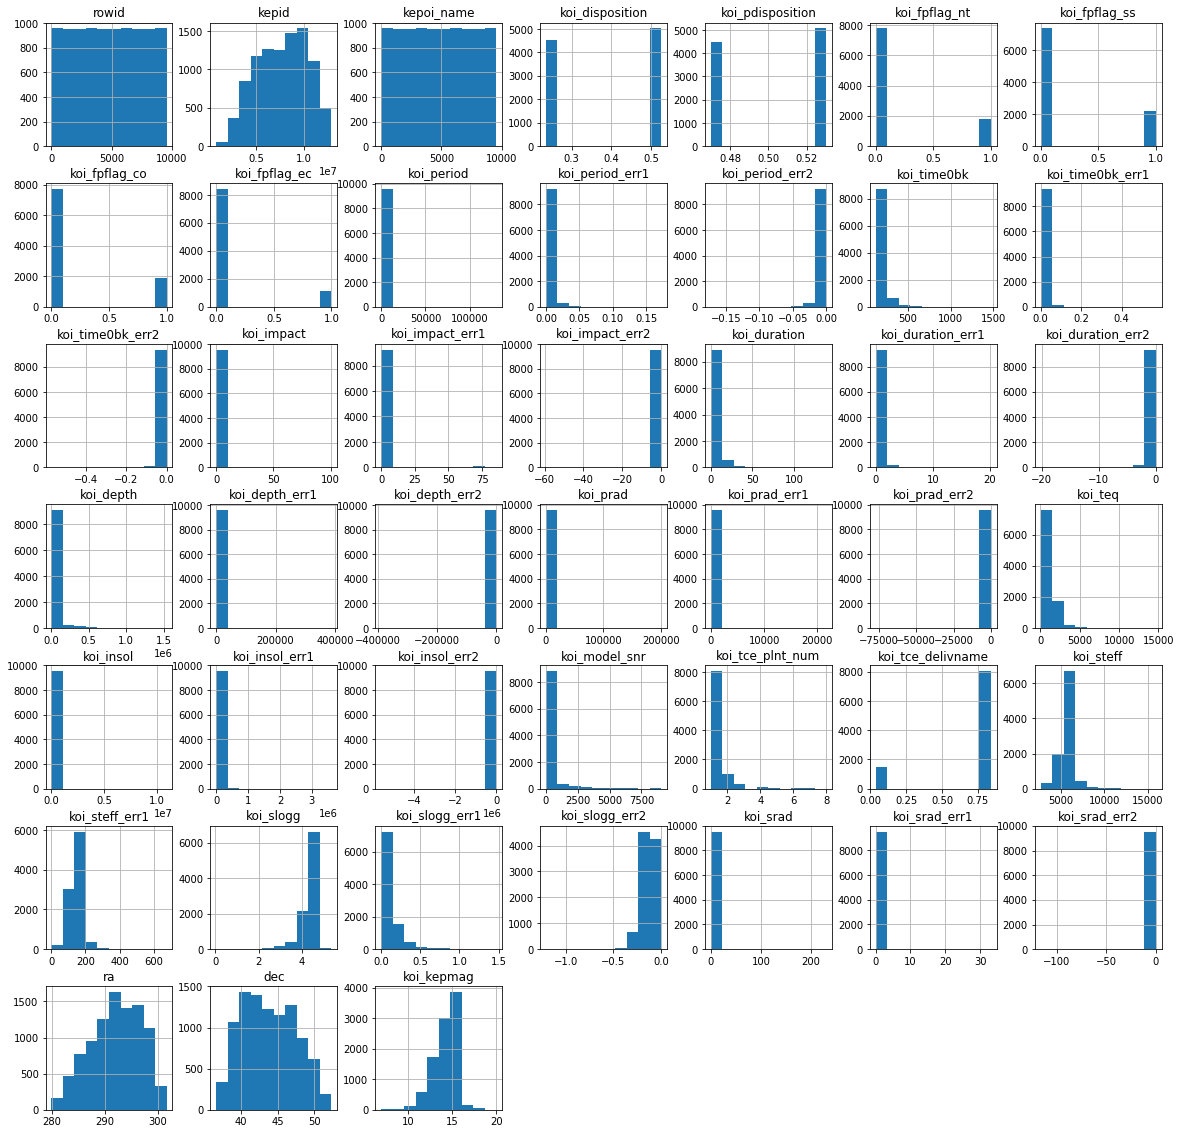

In [30]:
import matplotlib.pyplot as plt
data.hist(figsize=(20,20))
plt.show()

In [31]:
import scipy.stats as stats
import seaborn as sns

for col in data.drop(columns = ['rowid']+object_col).columns:
    if len(data[data[col] <= 0]) > 0:
        data[col] = data[col].sub(data[col].min() - 0.0000001)
    data[col], param = stats.boxcox(data[col]) 
    print(col, 'Оптимальное значение λ = {}'.format(param))

kepid Оптимальное значение λ = 1.0476015746957192
koi_fpflag_nt Оптимальное значение λ = -0.31978135073569386
koi_fpflag_ss Оптимальное значение λ = -0.24780480356697157
koi_fpflag_co Оптимальное значение λ = -0.3070874475171977
koi_fpflag_ec Оптимальное значение λ = -0.51581980017193
koi_period Оптимальное значение λ = -0.09124675843700877
koi_period_err1 Оптимальное значение λ = -0.05269924084467775
koi_period_err2 Оптимальное значение λ = 56.68224846736839
koi_time0bk Оптимальное значение λ = -4.213962635898045
koi_time0bk_err1 Оптимальное значение λ = 0.1385847617019599
koi_time0bk_err2 Оптимальное значение λ = 35.40766815561219
koi_impact Оптимальное значение λ = 0.22317263754826602
koi_impact_err1 Оптимальное значение λ = 0.031353188088270416
koi_impact_err2 Оптимальное значение λ = 54.34096947201991
koi_duration Оптимальное значение λ = -0.13011710707428928
koi_duration_err1 Оптимальное значение λ = 0.14374602343138945
koi_duration_err2 Оптимальное значение λ = 39.47670891609475

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


koi_insol Оптимальное значение λ = 0.009951261393936406
koi_insol_err1 Оптимальное значение λ = 0.0758758057353181
koi_insol_err2 Оптимальное значение λ = 22.938604073068987
koi_model_snr Оптимальное значение λ = -0.04095136912484287
koi_tce_plnt_num Оптимальное значение λ = -7.219257450161952
koi_steff Оптимальное значение λ = 0.5844731837985878
koi_steff_err1 Оптимальное значение λ = 0.7282234171583486
koi_slogg Оптимальное значение λ = 6.794280502626673


/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


koi_slogg_err1 Оптимальное значение λ = 0.12209230283685704
koi_slogg_err2 Оптимальное значение λ = 4.04934312774165
koi_srad Оптимальное значение λ = -0.5430299861550587
koi_srad_err1 Оптимальное значение λ = 0.12328169500452747
koi_srad_err2 Оптимальное значение λ = 74.94270767007492
ra Оптимальное значение λ = 9.285452880367943
dec Оптимальное значение λ = -0.30062277993109815
koi_kepmag Оптимальное значение λ = 3.260941835278969


/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


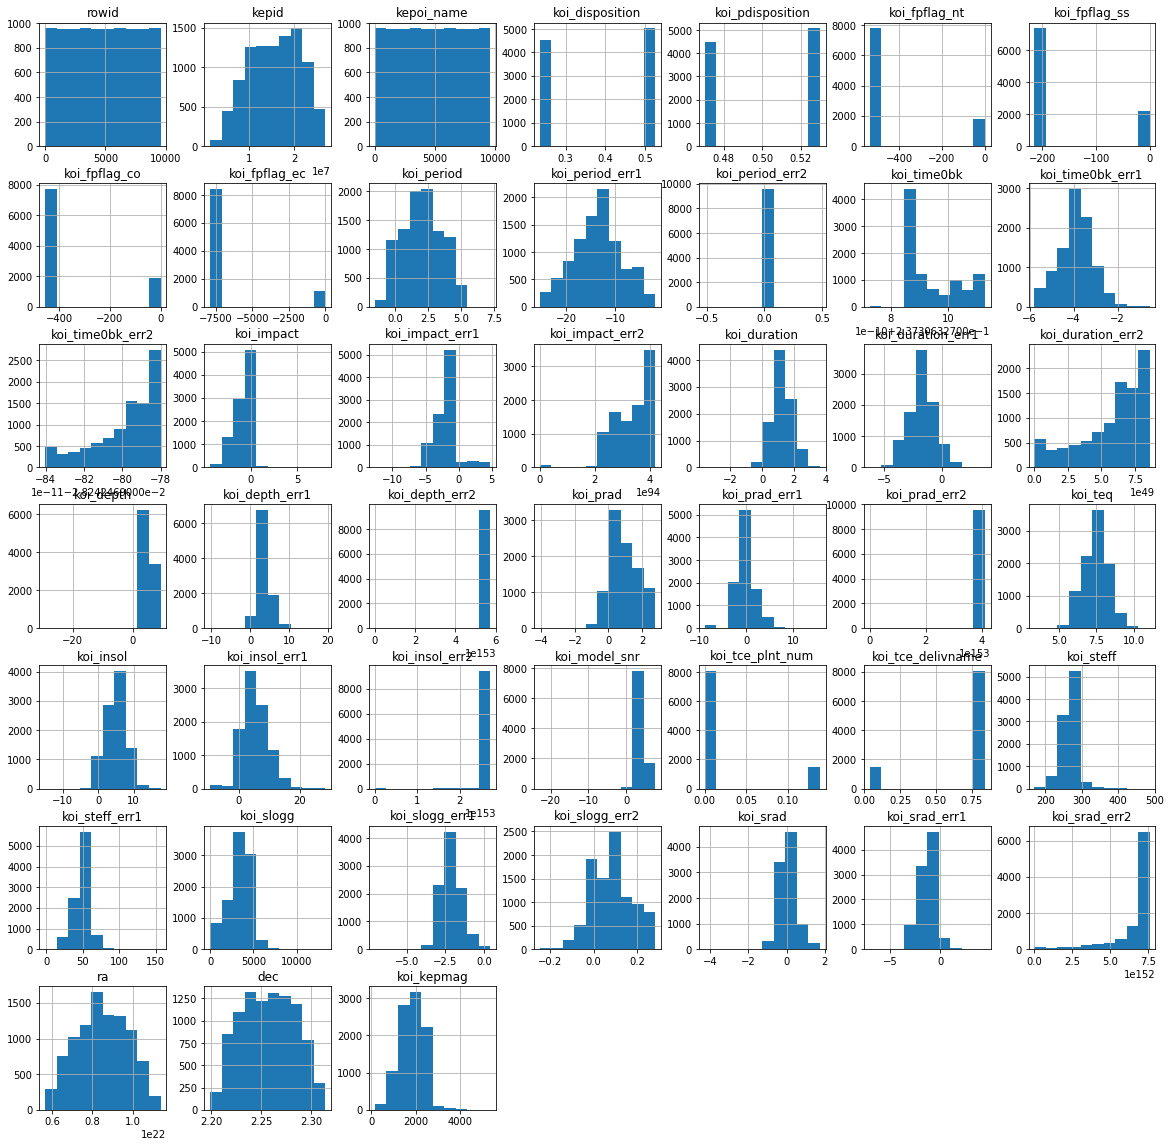

In [32]:
data.hist(figsize=(20,20))
plt.show()

В результате получили датасет без пропусков с нормализванными значениями